# CSE 514A Programming Assignment 1


# Introduction

## Your description/formulation of the problem
For the assignment, I will be using mini batch gradient descent to fit univariate and multivariate linear regression models to UCI Machine Learning Repository's Concrete Compressive Strenght Dataset. The dataset consists of 8 input variables (cement, blast furnace slage, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, age) and 1 output variable of concrete compressive strength. The dataset has 1030 instances and I will be using 900 instances for training and 130 instances for testing. The project may help assess concrete strength in current construction projects and to improve concrete strength in further projects. 


## A description of how you normalized or standardized your data
### Figures are shown in the outputs of the code below
The data was transformed using numpy's log transformation and sklearn's standardization and normalization packages. Out of the three processed dataset, I chose to use normalized dataset for the project. As you will see in the upcoming figures, I ran the ANOVA analysis on both raw data and normalized dataset, where there were no changes in p-values from raw dataset. 

## The details of your algorithm
I will be using mini batch gradient descent with batch size of 100, randomly selecting for each iteration. The stopping criterion will be the maximum iteration and I will be 

## Pseudo-code of your algorithm
learning rate, m, b



In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
import random
from torch.utils.data import DataLoader

## A) Data Pre-processing

Pre-process the attribute values of your data by normalizing or standardizing each variable. Keep a copy that was not pre-processed, so you can analyze the effect that pre-processing the data has on the optimization.

#### Raw data

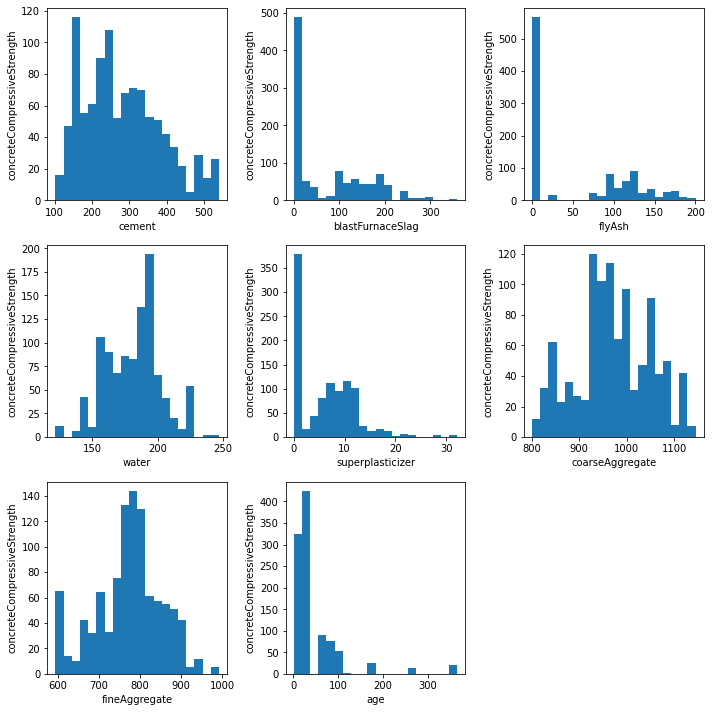

,cement,blastFurnaceSlag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,concreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [53]:
# raw data
headerlist = ['cement', 'blastFurnaceSlag', 'flyAsh', 'water', 'superplasticizer', 'coarseAggregate', 'fineAggregate', 'age', 'concreteCompressiveStrength']
data_old = pd.read_excel('Concrete_Data.xls', names=headerlist)

# plot raw data
plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.hist(data_old[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
    plt.ylabel(headerlist[8])
plt.tight_layout()
plt.show()

data_old = pd.DataFrame(data_old)
display(data_old)

#### ANOVA Analysis of raw data

In [54]:
model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_old).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

,sum_sq,df,F,PR(>F)
cement,21533.275004,1.0,199.093007,1.962842e-41
blastFurnaceSlag,11352.522594,1.0,104.963498,1.633083e-23
flyAsh,5281.328920,1.0,48.830271,5.029952e-12
water,1513.408558,1.0,13.992719,1.937337e-04
superplasticizer,1046.296383,1.0,9.673879,1.920901e-03
coarseAggregate,398.413243,1.0,3.683661,5.522656e-02
fineAggregate,383.539878,1.0,3.546145,5.996805e-02
age,47905.186982,1.0,442.923230,5.841045e-82
Residual,110428.156817,1021.0,NaN,NaN


#### Pre-processed data

#### 1. Log Transformation

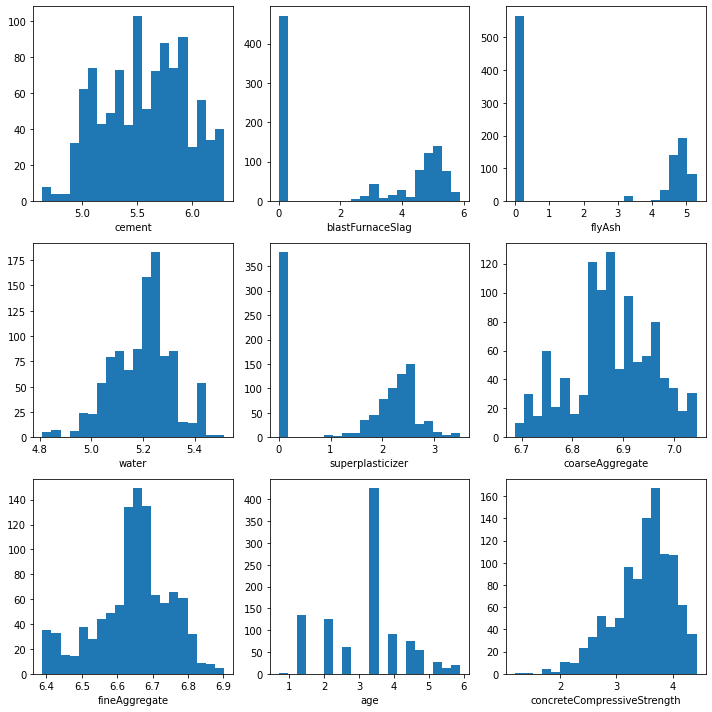

In [55]:
# log transform
data_log=np.log((data_old+1))
plt.figure(figsize=(10, 10))
plt.title('Log Transform')
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.hist(data_log[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
plt.tight_layout()
plt.show()

#### 2. Normalization

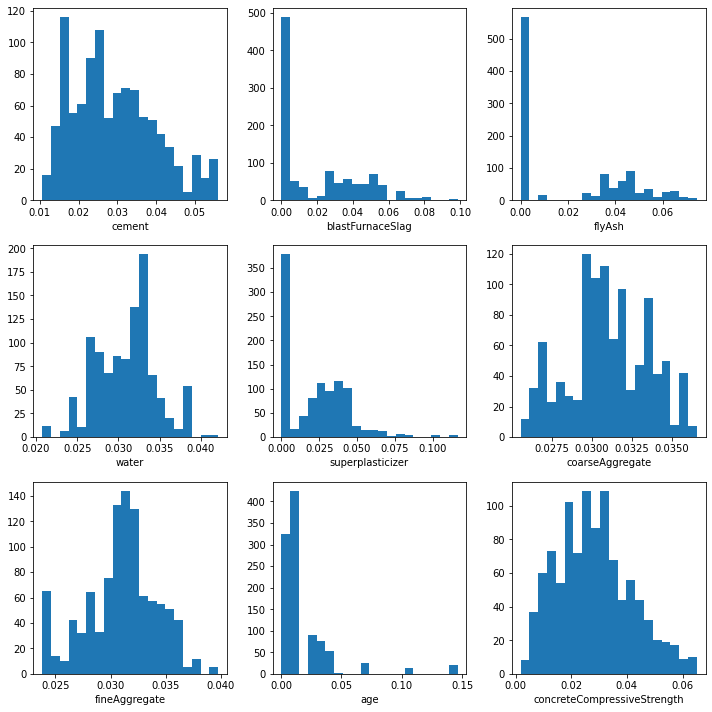

In [56]:
# normalization
data_normalized = pd.DataFrame(preprocessing.normalize(data_old, axis=0), columns=headerlist)
plt.figure(figsize=(10, 10))
plt.title('Normalization')
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.hist(data_normalized[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
plt.tight_layout()
plt.show()

### 3. Standardization

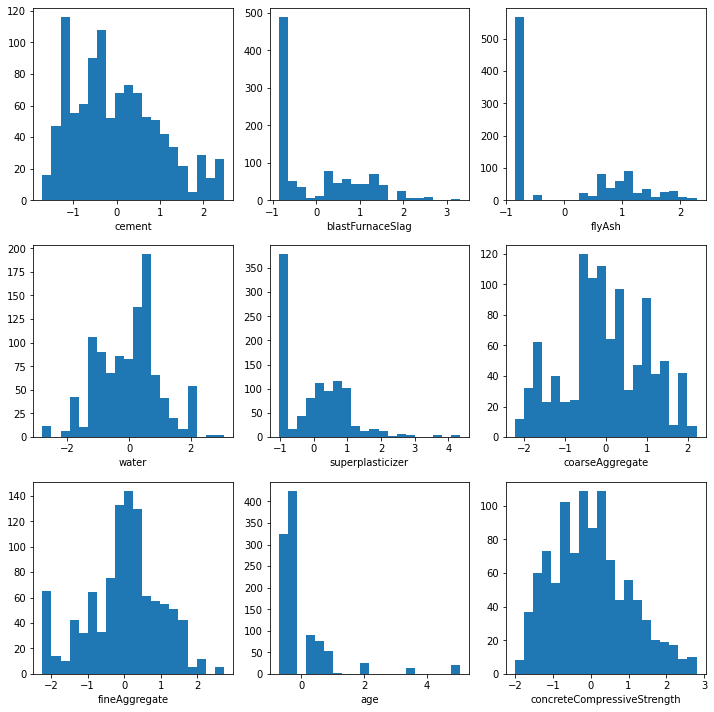

In [57]:
# standardization
data_standardized = pd.DataFrame(preprocessing.scale(data_old), columns=headerlist)
plt.figure(figsize=(10, 10))
plt.title('Standardization')
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.hist(data_standardized[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
plt.tight_layout()
plt.show()

### ANOVA analysis on pre-processed data

In [58]:
log_model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_log).fit()
normalized_model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_normalized).fit()
standardized_model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_standardized).fit()


log_anova_table = sm.stats.anova_lm(log_model, typ=2)
normalized_model_anova_table = sm.stats.anova_lm(normalized_model, typ=2)
standardized_model_anova_table = sm.stats.anova_lm(standardized_model, typ=2)

display(log_anova_table)
display(normalized_model_anova_table)
display(standardized_model_anova_table)

,sum_sq,df,F,PR(>F)
cement,32.581142,1.0,576.589776,2.272434e-101
blastFurnaceSlag,9.181933,1.0,162.493028,1.208949e-34
flyAsh,1.252454,1.0,22.164732,2.847219e-06
water,3.502163,1.0,61.977926,8.833088e-15
superplasticizer,1.818778,1.0,32.186983,1.822929e-08
coarseAggregate,0.013616,1.0,0.240957,6.236213e-01
fineAggregate,0.439288,1.0,7.774098,5.398504e-03
age,107.128501,1.0,1895.857350,5.742275e-235
Residual,57.693265,1021.0,NaN,NaN


,sum_sq,df,F,PR(>F)
cement,0.013387,1.0,199.093007,1.962842e-41
blastFurnaceSlag,0.007057,1.0,104.963498,1.633083e-23
flyAsh,0.003283,1.0,48.830271,5.029952e-12
water,0.000941,1.0,13.992719,1.937337e-04
superplasticizer,0.000650,1.0,9.673879,1.920901e-03
coarseAggregate,0.000248,1.0,3.683661,5.522656e-02
fineAggregate,0.000238,1.0,3.546145,5.996805e-02
age,0.029781,1.0,442.923230,5.841045e-82
Residual,0.068650,1021.0,NaN,NaN


,sum_sq,df,F,PR(>F)
cement,77.233135,1.0,199.093007,1.962842e-41
blastFurnaceSlag,40.717954,1.0,104.963498,1.633083e-23
flyAsh,18.942478,1.0,48.830271,5.029952e-12
water,5.428124,1.0,13.992719,1.937337e-04
superplasticizer,3.752738,1.0,9.673879,1.920901e-03
coarseAggregate,1.428984,1.0,3.683661,5.522656e-02
fineAggregate,1.375638,1.0,3.546145,5.996805e-02
age,171.820950,1.0,442.923230,5.841045e-82
Residual,396.071324,1021.0,NaN,NaN


### Splitting train-test data

I will be using normalized data to compare with raw data

In [59]:
# split data into train and test
X_old_train, X_old_test, y_old_train, y_old_test = train_test_split(data_old[headerlist[0:8]], data_old[headerlist[8]], test_size=130, random_state=0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(data_normalized[headerlist[0:8]], data_normalized[headerlist[8]], test_size=130, random_state=0)

display(X_old_train)
display(X_old_test)
display(y_old_train)
display(y_old_test)

,cement,blastFurnaceSlag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age
261,212.57,0.0,100.39,159.35,10.37,1003.80,903.79,28
65,342.00,38.0,0.00,228.00,0.00,932.00,670.00,270
310,295.71,0.0,95.64,171.54,8.87,955.14,859.20,14
940,296.00,0.0,106.70,221.40,10.50,819.20,778.40,28
596,170.30,155.5,0.00,185.70,0.00,1026.60,724.30,7
...,...,...,...,...,...,...,...,...
277,251.37,0.0,118.27,188.45,5.75,1028.40,757.73,56
763,385.00,0.0,0.00,186.00,0.00,966.00,763.00,1
835,144.00,0.0,175.00,158.00,18.00,943.00,844.00,28
559,239.60,359.4,0.00,185.70,0.00,941.60,664.30,28


,cement,blastFurnaceSlag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age
747,500.00,0.00,0.00,200.0,0.00,1125.0,613.00,3
718,122.60,183.90,0.00,203.5,0.00,958.2,800.10,7
175,362.60,189.00,0.00,164.9,11.60,944.7,755.80,91
828,522.00,0.00,0.00,146.0,0.00,896.0,896.00,28
713,157.00,236.00,0.00,192.0,0.00,935.4,781.20,3
...,...,...,...,...,...,...,...,...
588,186.20,124.10,0.00,185.7,0.00,1083.4,764.30,7
800,252.00,0.00,0.00,185.0,0.00,1111.0,784.00,7
685,133.00,200.00,0.00,192.0,0.00,927.4,839.20,7
356,277.19,97.82,24.46,160.7,11.19,1061.7,782.46,28


261    37.404073
65     55.064311
310    35.232224
940    31.420111
596    10.730315
         ...    
277    36.969703
763     6.267337
835    15.416683
559    39.435269
684    50.732334
Name: concreteCompressiveStrength, Length: 900, dtype: float64

747    26.062193
718    10.354551
175    79.296635
828    74.987410
713     9.694722
         ...    
588     7.995853
800    13.713678
685    13.664035
356    63.142212
729    37.914285
Name: concreteCompressiveStrength, Length: 130, dtype: float64

## B) Univariate Linear Regression

In [132]:
class univariate_regression:

    def __init__(self, X_train, X_test, Y_train, Y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test

    def initialize_variables(self):
        m = random.random()
        b = random.random()
        return m, b
    
    def make_predicton(self,m, X, b):
        return m*X + b
    
    def mse(self,Y, Y_pred):
        return(1/np.size(Y))*np.sum(np.subtract(Y, Y_pred)**2)

    def gradient_descent(self, X, Y, m, b, alpha, iterations):
        for i in range(iterations):
            index = np.random.choice(np.arange(len(X)), 100, replace=False)
            x_batch = X.iloc[index]
            y_batch = Y.iloc[index]
            Y_pred = self.make_predicton(m, x_batch, b)
            cost = self.mse(y_batch, Y_pred)
            D_m = (-2/np.size(y_batch))*np.sum(np.multiply(X, (y_batch - Y_pred)))
            D_b = (-2/np.size(y_batch))*np.sum(y_batch - Y_pred)
            m = m - alpha*D_m
            b = b - alpha*D_b
        return m, b, cost
    
    def plot(self, X, Y, m, b):
        plt.scatter(X, Y, color='blue')
        plt.plot(X, m*X + b, color='red')
        plt.show()
    
    def variance_explained(self, Y, Y_pred):
        return 1 - (self.mse(Y, Y_pred)/np.var(Y))
    
    def run(self, alpha, iterations):
        m, b = self.initialize_variables()
        m, b, cost = self.gradient_descent(self.X_train, self.Y_train, m, b, alpha, iterations)
        # self.plot(self.X_test, self.Y_test, m, b)
        Y_pred = self.make_predicton(m, self.X_test, b)
        variance_explained = self.variance_explained(self.Y_test, Y_pred)
        return m, b, cost, variance_explained
    

#### Fitting hyperparameters

In [136]:
learning_rates=[0.0000001, 0.000001, 0.00001, 0.0001]
iterations=[100, 1000, 10000, 100000]

for i in ['cement', 'blastFurnaceSlag', 'flyAsh', 'water', 'superplasticizer', 'coarseAggregate', 'fineAggregate', 'age']:
    for j in learning_rates:
        for k in iterations:
            print(i, j, k)
            model = univariate_regression(X_old_train[i], X_old_test[i], y_old_train, y_old_test)
            m, b, cost, variance_explained = model.run(j, k)
            print('m: ', m, 'b: ', b, 'cost: ', cost, 'variance_explained: ', variance_explained)


cement 1e-07 100
m:  0.10647995966218826 b:  0.593301209429767 cost:  204.96187420511419 variance_explained:  0.3106735486345209
cement 1e-07 1000
m:  0.12012192894406344 b:  0.647511020689447 cost:  255.12691556515557 variance_explained:  0.3299243822607657
cement 1e-07 10000
m:  0.12088702583342398 b:  0.35412302549294966 cost:  219.48954269942143 variance_explained:  0.3280650113153196
cement 1e-07 100000
m:  0.12051310232666675 b:  0.49729030858269363 cost:  207.07562471229977 variance_explained:  0.3289848357389469
cement 1e-06 100
m:  0.12102508695729115 b:  0.7788425804709244 cost:  214.71133329177397 variance_explained:  0.3255773519522026
cement 1e-06 1000
m:  0.11996298631021926 b:  0.8261853967280772 cost:  241.6178108522685 variance_explained:  0.32984727413862747
cement 1e-06 10000
m:  0.11899696979909248 b:  0.3562263109695628 cost:  277.0181189988184 variance_explained:  0.3335369466757192
cement 1e-06 100000


## C) Multivariate Linear Regression

In [ ]:
class multivariate_regression:

    def __init__(self, X_train, X_test, Y_train, Y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test

    def initialize_variables(self):
        m = random.random()
        b = random.random()
        return m, b
    
    def make_predicton(self,m, X, b):
        return m*X + b
    
    def mse(self,Y, Y_pred):
        return(1/np.size(Y))*np.sum(np.subtract(Y, Y_pred)**2)

    def gradient_descent(self, X, Y, m, b, alpha, iterations):
        for i in range(iterations):
            index = np.random.choice(np.arange(len(X)), 100, replace=False)
            x_batch = X.iloc[index]
            y_batch = Y.iloc[index]
            Y_pred = self.make_predicton(m, x_batch, b)
            cost = self.mse(y_batch, Y_pred)
            D_m = (-2/np.size(y_batch))*np.sum(np.multiply(X, (y_batch - Y_pred)))
            D_b = (-2/np.size(y_batch))*np.sum(y_batch - Y_pred)
            m = m - alpha*D_m
            b = b - alpha*D_b
        return m, b, cost
    
    def plot(self, X, Y, m, b):
        plt.scatter(X, Y, color='blue')
        plt.plot(X, m*X + b, color='red')
        plt.show()
    
    def variance_explained(self, Y, Y_pred):
        return 1 - (self.mse(Y, Y_pred)/np.var(Y))
    
    def run(self, alpha, iterations):
        m, b = self.initialize_variables()
        m, b, cost = self.gradient_descent(self.X_train, self.Y_train, m, b, alpha, iterations)
        # self.plot(self.X_test, self.Y_test, m, b)
        Y_pred = self.make_predicton(m, self.X_test, b)
        variance_explained = self.variance_explained(self.Y_test, Y_pred)
        return m, b, cost, variance_explained
    

# Results

# Discussion